#로지스틱 회귀(Logistic Regression)
---
로지스틱 회귀는 이름은 회귀이지만 분류 모델이다. 이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습한다. $z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f$
여기에서 a, b, c, d는 가중치이다. 이 값이 확률이 되려면 z는 [0, 1] 사이의 값이어야한다. 따라서 **시그모이드 함수(Sigmoid function)**를 사용한다.

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head() # 처음 5개의 행 출력

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


위의 데이터프레임에서 Species 열을 타깃으로 만들고 나머지 5개의 열을 입력 데이터로 사용하자. 데이터프레임에서 원하는 열을 리스트로 나열하면 열을 선택할 수 있다. 데이터프레임에서 여러 열을 선택하면 새로운 데이터 프레임이 반환된다. 이를 to_numpy() 메서드로 넘파이 배열로 바꾼 후 저장한다.

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

fish_target = fish['Species'].to_numpy() # 타깃 데이터
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42) # 훈련 세트 / 테스트 세트

ss = StandardScaler() # 표준화 전처리
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target), kn.score(test_scaled, test_target))

0.8907563025210085 0.85


#다중 분류(multi-class classification)
---
타깃 데잍에 2개 이상의 클래스가 포함된 문제를 다중 분류라고 한다. 모델을 만들고 훈련하는 방식은 이진 분류와 동일하고 클래스를 1과 0처럼 숫자로 분류할 수도 있지만 문자열로 된 타깃값을 그대로 이용할 수 있다.


In [ ]:
print(kn.classes_) # 타깃값을 사이킷런 모델에 전달하면 순서가 자동으로 정렬되어 pd.unique(fish['Species]) 출력 순서와 다르다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
import numpy as np

print(kn.predict(test_scaled[:5])) # 테스트 세트에 있는 처음 5개 샘플의 타깃값 예측
proba = kn.predict_proba(test_scaled[:5]) # 테스트 세트에 있는 처음 5개 샘플의 확률
print(np.round(proba, decimals = 4)) # 순서대로 Bream에 대한 확률, Parkki에 대한 확률, ... , Roach에 대한 확률

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4]) # 위의 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인하기 위해 네  번째 샘플의 최근접 이웃의 클래스를 확인해보자.
print(train_target[indexes]) # 이 샘플의 이웃은 다섯 번째 클래스인 Roach가 1개, 세 번째 클래스인 Perch가 2개 이므로 각각 약 0.3333과 0.6667로 같다.

[['Roach' 'Perch' 'Perch']]


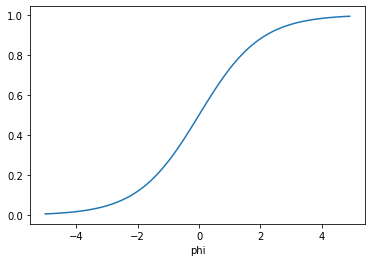

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.xlabel('phi')
plt.show()

#로지스틱 회귀로 이진 분류 수행하기
---
넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다. 이를 **불리언 인덱싱(boolean indexing)** 이라고 한다.



In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
from sklearn.linear_model import LogisticRegression

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # 도미와 빙어일 경우 True, 그 외는 모두 False 값이 들어가 있는 배열
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_) # 빙어(Smelt)가 양성 클래스(1)

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


In [ ]:
print(lr.coef_, lr.intercept_) # z = -0.4037798 * (Weight) - 0.57620209 * (Length) - 0.66280298 * (Diagonal) - 1.01290277 * (Height) + e * (Width) - 2.16155132

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
from scipy.special import expit

decisions = lr.decision_function(train_bream_smelt[:5]) # 처음 5개 샘플의 z 값
print(decisions)
print(expit(decisions)) # 시그모이드 통과

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


#로지스틱 회귀로 다중 분류 수행하기
---
LogisticRegression 클래스를 사용해 7개의 생성을 분류하며 이진 분류와의 차이점에 대해 알아보자. LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제하는데, 이를 L2 규제라고 부른다. 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절했지만, LogisticRegression에서는 C 매개변수로 규제를 제어한다. 하지만 alpha와는 반대로 C의 값이 작을수록 규제가 세진다. 


In [ ]:
lr = LogisticRegression(C = 20, max_iter = 1000) # C는 default 1이고 규제 완화를 위해 20으로 설정하자
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target), lr.score(test_scaled, test_target))

0.9327731092436975 0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

proba = lr.predict_proba(test_scaled[:5]) # 5개 샘플에 대한 (5행) 7개의 확률 (7열)
print(np.round(proba, decimals = 3))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_) # 첫 번째 샘플에서는 3번째 값이 가장 높으므로 농어(Perch)를 가장 높은 확률로 예측했다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape) # 이 데이터는 5개의 특성을 사용하므로 coef = 5 이다. intercept가 7이므로 이진분류에서 보았던 z를 7개 계산한다는 의미이다. => 가장 높은 z 값을 출력하는 클래스가 예측 클랙스

(7, 5) (7,)


다중 분류는 이진 분류(시그모이드)와 달리 **소프트맥스(softmax)**함수를 사용하여 n개의 z 값을 확률로 변환한다. n개의 z값을 z1 ~ zn 라고 하면 esum = $e^{z_1}$ + $e^{z_2}$ + ... $e^{z_n}$이고 $e^{z_1}$ ~ $e^{z_n}$을 각각 e_sum으로 나누어 주면 $S_1$ = $\frac{e^{z_1}} {esum}$, $S_2$ = $\frac{e^{z_2}} {esum}$, ... , $S_n$ = $\frac{e^{z_n}} {esum}$ 이 된다. $S_1$에서 $S_n$의 합이 1 이므로 확률의 합 1과도 잘 맞는 것을 볼 수 있다. 

In [ ]:
from scipy.special import softmax

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

proba = softmax(decision, axis = 1) # axis를 1로 설정하여 각 행, 즉 각 샘플에 대해 소프트맥스를 계산한다.
print(np.round(proba, decimals = 3))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
